In [158]:
import pandas as pd
#from sklearn.naive_bayes import MultinomialNB

In [173]:
# Load data
data = pd.read_csv('https://otf.ca/sites/default/files/OTF-Grants_since2000.csv')

In [174]:
data = data.drop(columns=['Funding Org:Org subventionnaire', 'Country Served:Pays servis', 'Province Served:Province servis', 'Cross-catchment indicator:Indicateur interrégional', 'Co-Application:Co-demandeurs', 'Description (French/Français)', 'Grant Result:Résultat de subvention','Rescinded/Recovered:Révoqué/récupéré','Rescinded/Recovered Initiated By:Révoqué/récupéré intié par','Amount Rescinded/Recovered:Montant révoqué/récupéré', 'Last modified:Mise à jour'])
data.columns = ['fiscal_year','grant_program','geographical_area','identifier','org_name','submission_date', 'approval_date', 'amount_applied', 'amount_awarded', 'planned_duration', 'description', 'program_area', 'budget_fund', 'org_incorporation_num', 'org_charitable_reg_num', 'org_city', 'org_postcode', 'population_served', 'age_group']

In [175]:
description = pd.DataFrame(data, columns = ['description'])

In [176]:
# remove structured text and keep only free-form text
a = description['description'].str.split('programs for Ontarians by ').str[1].dropna()
b = description['description'].str.split('grant over \d+ years to ').str[1].dropna()
c = description['description'].str.split('rebuild and recover from impacts of COVID-19 by ').str[1].dropna()
d = description['description'].str.split('grant over \d+ months to ').str[1].dropna()
e = description['description'].str.split('\$\d+( \w+|[\d,]+) over \d+ months to ').str[2].dropna()
f = description['description'].str.split('\$\d+( \w+|[\d,]+) over one year to ').str[2].dropna()
g = description['description'].str.split('\$\d+( \w+|[\d,]+) over two years to ').str[2].dropna()
h = description['description'].str.split('\$\d+( \w+|[\d,]+) over three years to ').str[2].dropna()
i = description['description'].str.split('\$\d+( \w+|[\d,]+) over six months to ').str[2].dropna()
j = description['description'].str.split('This project aims to ').str[1].dropna()

In [177]:
description_clean = pd.concat([a, b, c, d, e, f, g, h, i, j], axis=0,ignore_index=False)
description_clean = description_clean.to_frame()

In [180]:
add_indices = pd.Index(range(27952)).difference(description_clean.index)
add_df = pd.DataFrame(index=add_indices, columns=x.columns).fillna(description)
description_clean = pd.concat([description_clean, add_df])

In [204]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1,1), min_df = 50, max_df = 0.95, stop_words='english')
#counts_sparse = vectorizer.fit_transform(description_clean['description'])
#counts = pd.DataFrame(counts_sparse.toarray(), index=description_clean.index, columns=vectorizer.get_feature_names())
#counts

,000,10,100,11,12,120,13,14,15,150,...,works,workshop,workshops,world,writing,year,years,york,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27946,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
27949,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27950,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df=100)
counts_sparse = vectorizer.fit_transform(description_clean['description'])
counts = pd.DataFrame(counts_sparse.toarray(), index=description_clean.index, columns=vectorizer.get_feature_names())
counts

,000,10,100,11,12,13,14,15,150,16,...,works,workshop,workshops,world,would,year,years,york,young,youth
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27946,0.192368,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.244844,0.000000,0.0,0.0,0.000000
27949,0.141192,0.0,0.0,0.0,0.245614,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.177547,0.0,0.0,0.000000
27950,0.000000,0.0,0.0,0.0,0.000000,0.300691,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
27951,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.168727


In [194]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(counts)

PCA(n_components=10)

In [196]:
from sklearn.cluster import KMeans


Text(0, 0.5, 'inertia (WSS)')

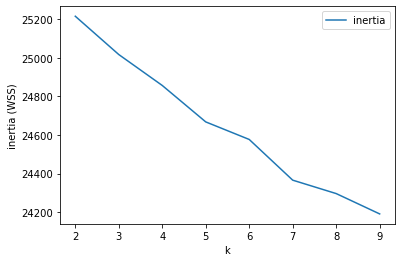

In [206]:
inertia_list = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(counts)
    cluster_id = pd.Series(model.predict(counts))
    inertia_list.append({'k':k, 'inertia':model.inertia_})

ax = pd.DataFrame(inertia_list).set_index('k').plot.line()
ax.set_ylabel('inertia (WSS)')

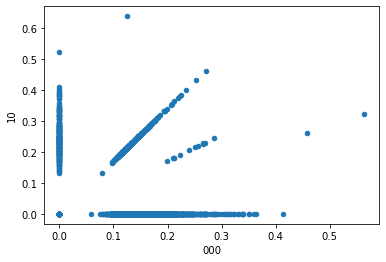

In [199]:
model = KMeans(n_clusters=8)
model.fit(counts)
assignments = pd.Series(model.predict(counts))
ax = counts.plot.scatter(0, 1)

In [181]:
#pd.DataFrame(x).to_csv('x.csv', index=True, header=False)

In [156]:
#pd.DataFrame(description).to_csv('desc.csv', index=True, header=False)

AttributeError: 'tuple' object has no attribute 'isna'

pandas.core.strings.StringMethods

In [5]:
vectorizer = CountVectorizer(ngram_range=(1,1), min_df = 50, max_df = 0.95, stop_words='english')
featured_sparse = vectorizer.fit_transform(data['description'])
featured = pd.DataFrame(featured_sparse.toarray(), index=data.index, columns=vectorizer.get_feature_names())

In [88]:
featured = data.join(featured)


In [89]:
# Split data
training = featured.head(22360)
testing = featured.tail(5593)
holdout = training.groupby('grant_program', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=3))
training = training.drop(holdout.index)

In [90]:
training.shape

(17888, 1439)